# Cross-correlation

#Test nº 7

**Here we will simulate a two-body model which both prisms have the same dimension and the same magnetization direction as the magnetic field. We will test the correlation for both positive and negative intervals for inclination and also by using the free and corrupted noised total field data.**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from codes.prism import prism_tf
from codes.plot import draw_prism

In [3]:
n = 100 # points
x = np.linspace(-2000, 2000, n) # horizontal vectors
y = np.copy(x)
z = -100.
X, Y = np.meshgrid(x, y) # grid

In [78]:
model1 = [-500., -200., -500., -200., 200., 600., 0.962]
model2 = [200., 500., 200., 500., 200., 600., 0.796]
area1 = (model1[:4])
area2 = (model2[:4])

incf, decf = 50., 50. # campo
incs = incf
decs = decf

In [79]:
tf1 = prism_tf(X, Y, z, model1, incf, decf, incs, decs) # total-field anomaly
tf2 = prism_tf(X, Y, z, model2, incf, decf, incs, decs) # total-field anomaly

In [80]:
# Total field anomaly due the both prisms
tf = tf1 + tf2

In [81]:
from codes.statistical import analysis
from codes.auxiliars import addnoise

In [82]:
print 'Total field by the first model:'
_ = analysis(tf1, 'nT') # analyzing

Total field by the first model:
Minimum:    -13.4608 nT
Maximum:    41.7020 nT
Mean value: 0.1772 nT
Variation:  55.1628 nT


In [83]:
print 'Total field by the second model:'
_ = analysis(tf2, 'nT') # analyzing

Total field by the second model:
Minimum:    -11.0900 nT
Maximum:    34.4933 nT
Mean value: 0.2134 nT
Variation:  45.5833 nT


In [84]:
print 'Total field anomaly:'
_ = analysis(tf, 'nT') # analyzing

Total field anomaly:
Minimum:    -11.9609 nT
Maximum:    43.5413 nT
Mean value: 0.3906 nT
Variation:  55.5022 nT


In [85]:
# Including noise
tf1_noise = addnoise(tf1, 1.0, 0.1)
tf2_noise = addnoise(tf2, 1.0, 0.1)

In [86]:
# All data
tf_noisy = tf1_noise + tf2_noise

In [87]:
print 'First noised anomaly:'
_ = analysis(tf1_noise, 'nT') # analyzing

First noised anomaly:
Minimum:    -12.5461 nT
Maximum:    42.8996 nT
Mean value: 1.1780 nT
Variation:  55.4457 nT


In [88]:
print 'Second noised anomaly:'
_ = analysis(tf2_noise, 'nT') # analyzing

Second noised anomaly:
Minimum:    -10.1223 nT
Maximum:    35.6735 nT
Mean value: 1.2126 nT
Variation:  45.7957 nT


In [89]:
print 'Noised total field:'
_ = analysis(tf_noisy, 'nT') # analyzing

Noised total field:
Minimum:    -10.1261 nT
Maximum:    45.7484 nT
Mean value: 2.3906 nT
Variation:  55.8746 nT


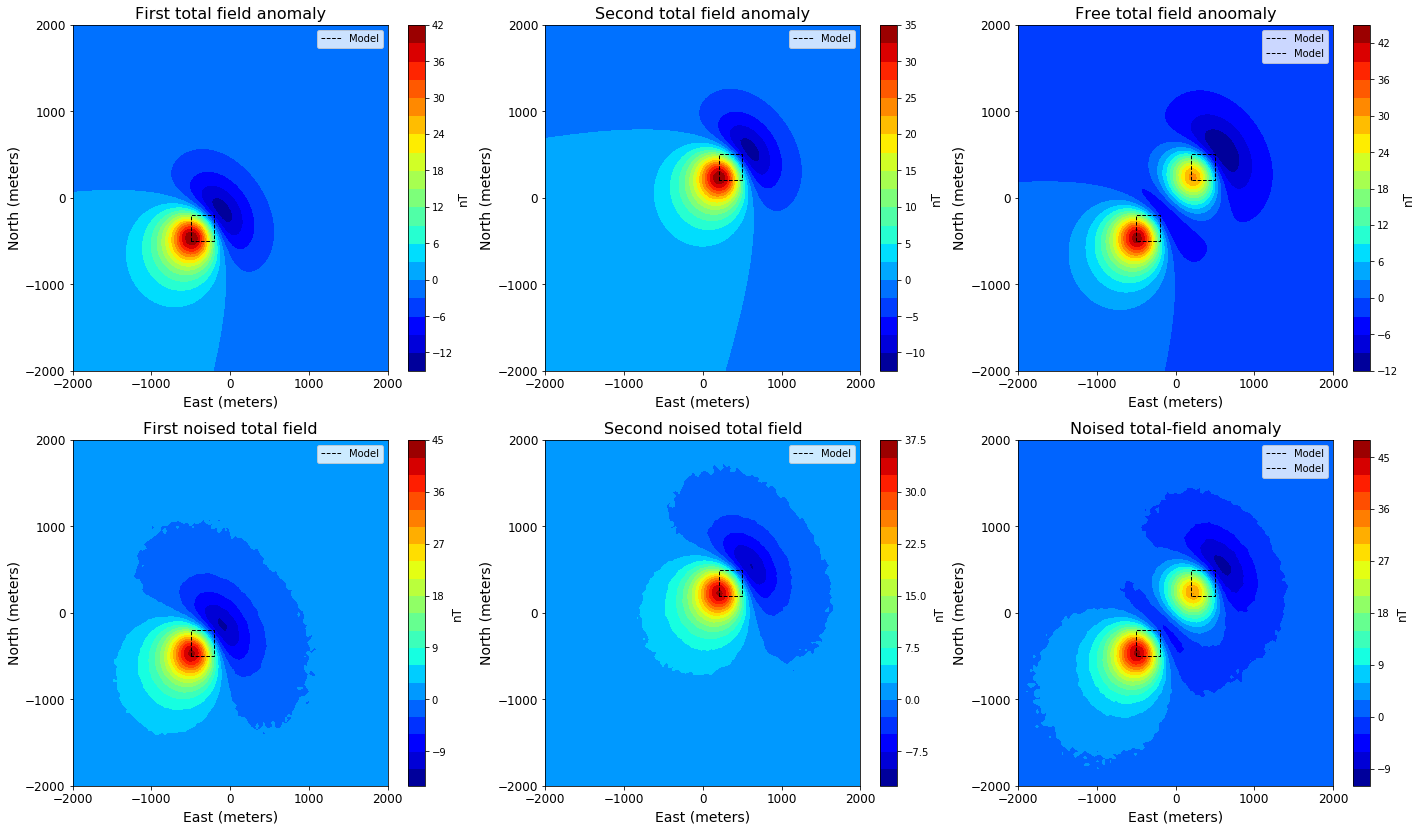

In [90]:
plt.close('all')
plt.figure(figsize=(24, 14))

plt.subplot(2, 3, 1)
plt.contourf(Y, X, tf1, 20, cmap = plt.cm.jet)
draw_prism(area1, linewidth=1, label = 'Model', xy2ne=True)
#plt.text(-1900., 1500., 'Figure (A)', fontsize = 12, bbox = dict(facecolor = 'white', alpha = 1))
plt.title('First total field anomaly', fontsize = 16)
plt.xlabel('East (meters)', fontsize = 14)
plt.ylabel('North (meters)', fontsize = 14)
plt.xticks(np.linspace(x.min(), x.max(), 5), fontsize = 12)
plt.yticks(np.linspace(y.min(), y.max(), 5), fontsize = 12)
cb = plt.colorbar()
cb.set_label('nT', fontsize = 12)
plt.legend(loc = 'best')

plt.subplot(2, 3, 2)
plt.contourf(Y, X, tf2, 20, cmap = plt.cm.jet)
draw_prism(area2, linewidth=1, label = 'Model', xy2ne=True)
#plt.text(1300., 1500., 'Figure (A)', fontsize = 12, bbox = dict(facecolor = 'white', alpha = 1))
plt.title('Second total field anomaly', fontsize = 16)
plt.xlabel('East (meters)', fontsize = 14)
plt.ylabel('North (meters)', fontsize = 14)
plt.xticks(np.linspace(x.min(), x.max(), 5), fontsize = 12)
plt.yticks(np.linspace(y.min(), y.max(), 5), fontsize = 12)
cb = plt.colorbar()
cb.set_label('nT', fontsize = 12)
plt.legend(loc = 'best')

plt.subplot(2, 3, 3)
plt.contourf(Y, X, tf, 20, cmap = plt.cm.jet)
draw_prism(area1, linewidth=1, label = 'Model', xy2ne=True)
draw_prism(area2, linewidth=1, label = 'Model', xy2ne=True)
#plt.text(1300., 1500., 'Figure (A)', fontsize = 12, bbox = dict(facecolor = 'white', alpha = 1))
plt.title('Free total field anoomaly', fontsize = 16)
plt.xlabel('East (meters)', fontsize = 14)
plt.ylabel('North (meters)', fontsize = 14)
plt.xticks(np.linspace(x.min(), x.max(), 5), fontsize = 12)
plt.yticks(np.linspace(y.min(), y.max(), 5), fontsize = 12)
cb = plt.colorbar()
cb.set_label('nT', fontsize = 12)
plt.legend(loc = 'best')

plt.subplot(2, 3, 4)
plt.contourf(Y, X, tf1_noise, 20, cmap = plt.cm.jet)
draw_prism(area1, linewidth=1, label = 'Model', xy2ne=True)
#plt.text(-1900., 1500., 'Figure (A)', fontsize = 12, bbox = dict(facecolor = 'white', alpha = 1))
plt.title('First noised total field', fontsize = 16)
plt.xlabel('East (meters)', fontsize = 14)
plt.ylabel('North (meters)', fontsize = 14)
plt.xticks(np.linspace(x.min(), x.max(), 5), fontsize = 12)
plt.yticks(np.linspace(y.min(), y.max(), 5), fontsize = 12)
cb = plt.colorbar()
cb.set_label('nT', fontsize = 12)
plt.legend(loc = 'best')

plt.subplot(2, 3, 5)
plt.contourf(Y, X, tf2_noise, 20, cmap = plt.cm.jet)
draw_prism(area2, linewidth=1, label = 'Model', xy2ne=True)
#plt.text(1300., 1500., 'Figure (A)', fontsize = 12, bbox = dict(facecolor = 'white', alpha = 1))
plt.title('Second noised total field', fontsize = 16)
plt.xlabel('East (meters)', fontsize = 14)
plt.ylabel('North (meters)', fontsize = 14)
plt.xticks(np.linspace(x.min(), x.max(), 5), fontsize = 12)
plt.yticks(np.linspace(y.min(), y.max(), 5), fontsize = 12)
cb = plt.colorbar()
cb.set_label('nT', fontsize = 12)
plt.legend(loc = 'best')

plt.subplot(2, 3, 6)
plt.contourf(Y, X, tf_noisy, 20, cmap = plt.cm.jet)
draw_prism(area1, linewidth=1, label = 'Model', xy2ne=True)
draw_prism(area2, linewidth=1, label = 'Model', xy2ne=True)
#plt.text(1300., 1500., 'Figure (A)', fontsize = 12, bbox = dict(facecolor = 'white', alpha = 1))
plt.title('Noised total-field anomaly', fontsize = 16)
plt.xlabel('East (meters)', fontsize = 14)
plt.ylabel('North (meters)', fontsize = 14)
plt.xticks(np.linspace(x.min(), x.max(), 5), fontsize = 12)
plt.yticks(np.linspace(y.min(), y.max(), 5), fontsize = 12)
cb = plt.colorbar()
cb.set_label('nT', fontsize = 12)
plt.legend(loc = 'best')

#plt.savefig('test07-fig01-anomaly.png', dpi = 300, facecolor='w', edgecolor='w', bbox_inches='tight')
plt.show()

In [91]:
from codes.statistical import cccoef # correlation coefficient

In [92]:
from codes.filtering import reduction
from codes.derivative import totalgrad, zderiv

(A) Using the freeUsing a free total field anomaly

In [93]:
inc_pos = np.arange(10, 91, 1) # inclination positive values
inc_neg = np.arange(-90,-9, 1) # inclination negative values
dec = np.arange(-180., 181., 1.) # declination both values

Dec_pos, Inc_pos = np.meshgrid(dec, inc_pos) # positive grid
Dec_neg, Inc_neg = np.meshgrid(dec, inc_neg) # negative grid

In [95]:
ni, nd = inc_pos.size, dec.size # number of points
res_pos = np.zeros_like(Dec_pos) # zero matrix for positive
res_neg = np.zeros_like(Dec_neg) # zero matrix for negative

In [96]:
# Correlation for positive interval
for j in range(nd):
    for i in range(ni):    
        rtp_pos = reduction(x, y, tf, incf, decf, inc_pos[i], dec[j])
        tga_pos = totalgrad(x, y, rtp_pos)
        vga_pos = zderiv(x, y, rtp_pos)
        res_pos[i,j] = cccoef(tga_pos, vga_pos)

codes/auxiliars.py:182: RuntimeWarning: invalid value encountered in divide
  theta = z + ((x*u + y*v)/k)*1j


In [97]:
# Correlation for negative interval
for i in range(ni):
    for j in range(nd):
        rtp_neg = reduction(x, y, tf, incf, decf, inc_neg[i], dec[j])
        tga_neg = totalgrad(x, y, rtp_neg)
        vga_neg = zderiv(x, y, rtp_neg)
        res_neg[i,j] = cccoef(tga_neg, vga_neg)

In [102]:
print 'Correlacao (inclinacao positiva)'
_ = analysis(res_pos)
print
print 'Correlacao (inclinacao negativa)'
_ = analysis(res_neg)

Correlacao (inclinacao positiva)
Minimum:    0.4056
Maximum:    0.8261
Mean value: 0.7045
Variation:  0.4205

Correlacao (inclinacao negativa)
Minimum:    -0.8261
Maximum:    -0.4056
Mean value: -0.7046
Variation:  0.4205


In [103]:
imax_pos, jmax_pos = np.where(res_pos == res_pos.max())
imin_pos, jmin_pos = np.where(res_pos == res_pos.min())
inc_pos_max = float(Inc_pos[imax_pos, jmax_pos])
dec_pos_max = float(Dec_pos[imax_pos, jmax_pos])

inc_pos_min = float(Inc_pos[imin_pos, jmin_pos])
dec_pos_min = float(Dec_pos[imin_pos, jmin_pos])
print 'Maxima correlacao:'
print 'Inclination:', inc_pos_max
print 'Declination:', dec_pos_max
print
print 'Minima correlacao:'
print 'Inclination:', inc_pos_min
print 'Declination:', dec_pos_min

Maxima correlacao:
Inclination: 49.0
Declination: 50.0

Minima correlacao:
Inclination: 10.0
Declination: -59.0


In [104]:
imax_neg, jmax_neg = np.where(res_neg == res_neg.max())
imin_neg, jmin_neg = np.where(res_neg == res_neg.min())
inc_neg_max = float(Inc_neg[imax_neg, jmax_neg])
dec_neg_max = float(Dec_neg[imax_neg, jmax_neg])

inc_neg_min =float(Inc_neg[imin_neg, jmin_neg])
dec_neg_min = float(Dec_neg[imin_neg, jmin_neg])
print 'Maxima correlacao:'
print 'Inclination:', inc_neg_max
print 'Declination:', dec_neg_max
print
print 'Minima correlacao:'
print 'Inclination:', inc_neg_min
print 'Declination:', dec_neg_min

Maxima correlacao:
Inclination: -10.0
Declination: 121.0

Minima correlacao:
Inclination: -49.0
Declination: -130.0


In [105]:
# True values
print 'True pair:', '(', incs, '/', decs, ')'

True pair: ( 50.0 / 50.0 )


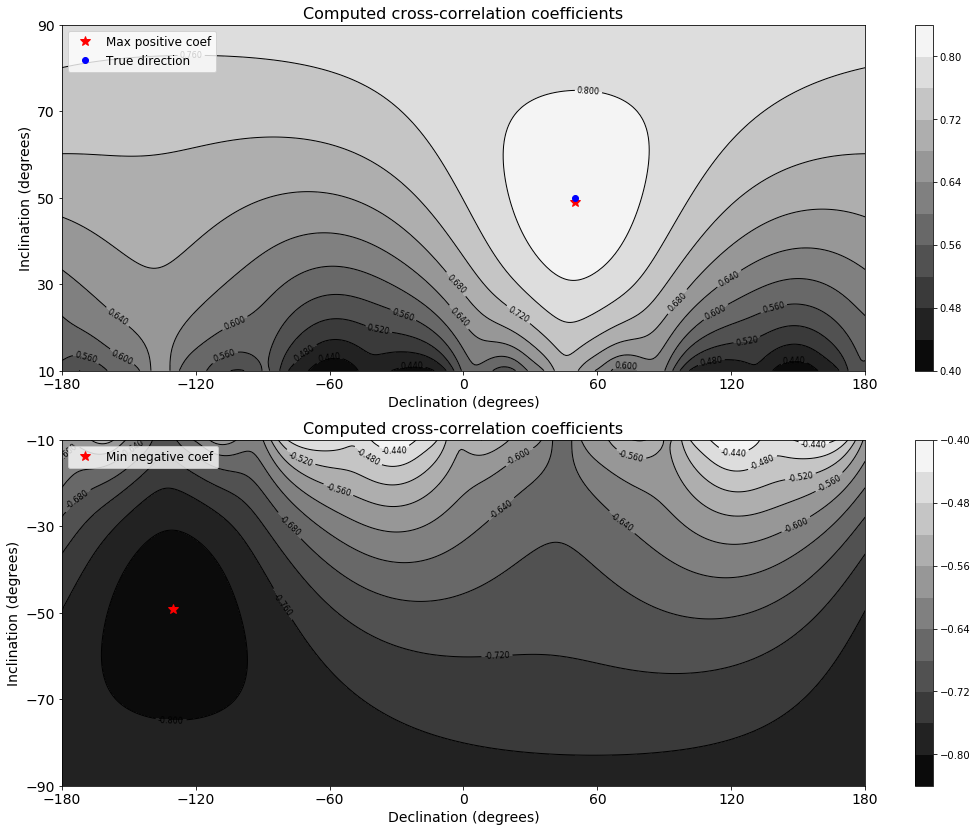

In [110]:
# Plotting the results
plt.close('all')
plt.figure(figsize=(18, 14))

plt.subplot(2,1,1)
plot1 = plt.contour(Dec_pos, Inc_pos, res_pos, 10, colors = 'k', linestyle = 'solid', linewidths = 1)
plt.contourf(Dec_pos, Inc_pos, res_pos, 10, cmap = plt.cm.gray)
plt.plot(dec_pos_max, inc_pos_max, 'r*', markersize = 10, label = 'Max positive coef')
plt.plot(decs, incs, 'bo', markersize = 6, label = 'True direction')
plt.clabel(plot1, fontsize = 8)
plt.rcParams['contour.negative_linestyle'] = 'solid'
plt.title('Computed cross-correlation coefficients', fontsize = 16)
plt.xlabel('Declination (degrees)', fontsize = 14)
plt.ylabel('Inclination (degrees)', fontsize = 14)
plt.xticks(np.arange(-180., 181., 60),fontsize = 14)
plt.yticks(np.arange(10., 91., 20), fontsize = 14)
cb = plt.colorbar()
plt.legend(loc = 'upper left', fontsize = 'large')

plt.subplot(2,1,2)
plot2 = plt.contour(Dec_neg, Inc_neg, res_neg, 10, colors = 'k', linestyle = 'solid', linewidths = 1)
plt.contourf(Dec_neg, Inc_neg, res_neg, 10, cmap = plt.cm.gray)
plt.plot(dec_neg_min, inc_neg_min, 'r*', markersize = 10, label = 'Min negative coef')
plt.clabel(plot2, fontsize = 8)
plt.rcParams['contour.negative_linestyle'] = 'solid'
plt.title('Computed cross-correlation coefficients', fontsize = 16)
plt.xlabel('Declination (degrees)', fontsize = 14)
plt.ylabel('Inclination (degrees)', fontsize = 14)
plt.xticks(np.arange(-180., 181., 60),fontsize = 14)
plt.yticks(np.arange(-90., -9., 20), fontsize = 14)
cb = plt.colorbar()
plt.legend(loc = 'upper left', fontsize = 'large')

#plt.savefig('test07-fig02-1st_correlation.png', dpi = 300, facecolor='w', edgecolor='w', bbox_inches='tight')
plt.show()

(B) Using the noised total field anomaly

In [111]:
inc_pos = np.arange(10, 91, 1) # inclination positive values
inc_neg = np.arange(-90,-9, 1) # inclination negative values
dec = np.arange(-180., 181., 1.) # declination both values
#inc_pos = np.linspace(10., 91., 181)
#inc_neg = np.linspace(-90., -9., 181)
#dec = np.linspace(-180., 180., 721.)
Dec_pos, Inc_pos = np.meshgrid(dec, inc_pos) # positive grid
Dec_neg, Inc_neg = np.meshgrid(dec, inc_neg) # negative grid

In [112]:
ni, nd = inc_pos.size, dec.size # number of points
res_pos = np.zeros_like(Dec_pos) # zero matrix for positive
res_neg = np.zeros_like(Dec_neg) # zero matrix for negative

In [113]:
# Correlation for positive interval
for i in range(ni):   
    for j in range(nd):     
        rtp_pos = reduction(x, y, tf_noisy, incf, decf, inc_pos[i], dec[j])
        tga_pos = totalgrad(x, y, rtp_pos)
        vga_pos = zderiv(x, y, rtp_pos)
        res_pos[i,j] = cccoef(tga_pos, vga_pos)

In [114]:
# Correlation for negative interval
for i in range(ni): 
    for j in range(nd):
        rtp_neg = reduction(x, y, tf_noisy, incf, decf, inc_neg[i], dec[j])
        tga_neg = totalgrad(x, y, rtp_neg)
        vga_neg = zderiv(x, y, rtp_neg)
        res_neg[i,j] = cccoef(tga_neg, vga_neg)  

In [115]:
print 'Correlacao (inclinacao positiva)'
_ = analysis(res_pos)
print
print 'Correlacao (inclinacao negativa)'
_ = analysis(res_neg)

Correlacao (inclinacao positiva)
Minimum:    0.3891
Maximum:    0.7790
Mean value: 0.6703
Variation:  0.3900

Correlacao (inclinacao negativa)
Minimum:    -0.7790
Maximum:    -0.3891
Mean value: -0.6704
Variation:  0.3900


In [116]:
imax_pos, jmax_pos = np.where(res_pos == res_pos.max())
imin_pos, jmin_pos = np.where(res_pos == res_pos.min())
inc_pos_max = float(Inc_pos[imax_pos, jmax_pos])
dec_pos_max = float(Dec_pos[imax_pos, jmax_pos])

inc_pos_min = float(Inc_pos[imin_pos, jmin_pos])
dec_pos_min = float(Dec_pos[imin_pos, jmin_pos])
print 'Maxima correlacao:'
print 'Inclination:', inc_pos_max
print 'Declination:', dec_pos_max
print
print 'Minima correlacao:'
print 'Inclination:', inc_pos_min
print 'Declination:', dec_pos_min

Maxima correlacao:
Inclination: 51.0
Declination: 50.0

Minima correlacao:
Inclination: 10.0
Declination: -58.0


In [117]:
imax_neg, jmax_neg = np.where(res_neg == res_neg.max())
imin_neg, jmin_neg = np.where(res_neg == res_neg.min())
inc_neg_max = float(Inc_neg[imax_neg, jmax_neg])
dec_neg_max = float(Dec_neg[imax_neg, jmax_neg])

inc_neg_min =float(Inc_neg[imin_neg, jmin_neg])
dec_neg_min = float(Dec_neg[imin_neg, jmin_neg])
print 'Maxima correlacao:'
print 'Inclination:', inc_neg_max
print 'Declination:', dec_neg_max
print
print 'Minima correlacao:'
print 'Inclination:', inc_neg_min
print 'Declination:', dec_neg_min

Maxima correlacao:
Inclination: -10.0
Declination: 122.0

Minima correlacao:
Inclination: -51.0
Declination: -130.0


In [118]:
# True values
print 'True inclination:', incs
print 'True declination:', decs

True inclination: 50.0
True declination: 50.0


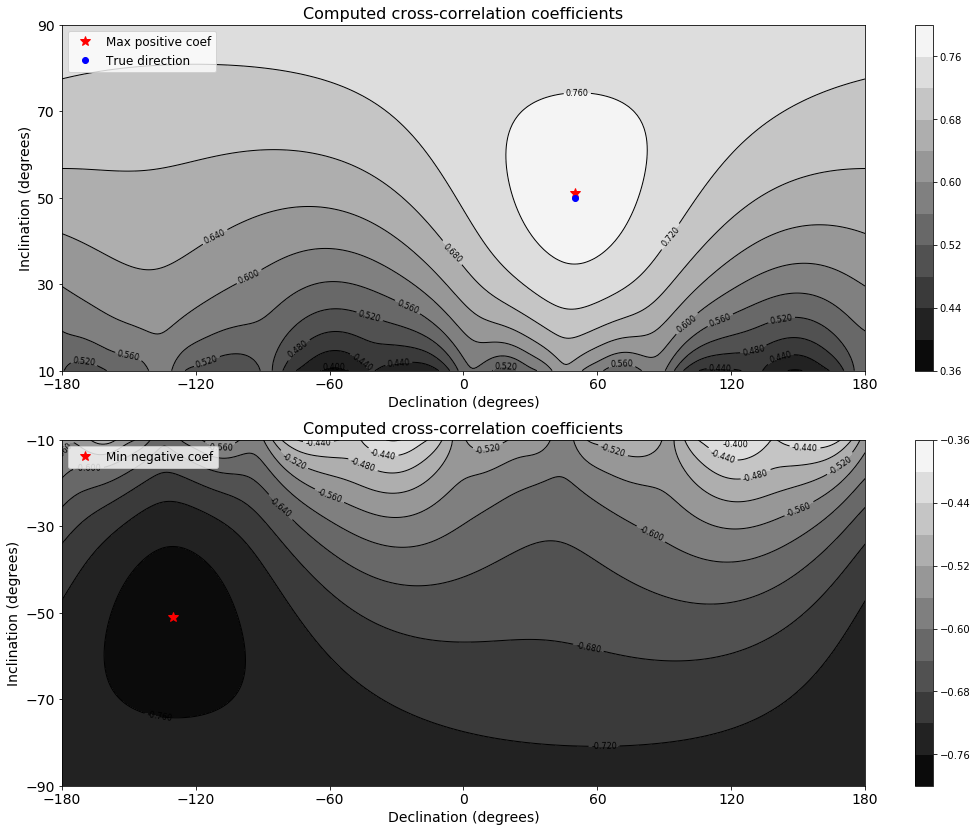

In [119]:
# Plotting the results
plt.close('all')
plt.figure(figsize=(18, 14))

plt.subplot(2,1,1)
plot1 = plt.contour(Dec_pos, Inc_pos, res_pos, 10, colors = 'k', linestyle = 'solid', linewidths = 1)
plt.contourf(Dec_pos, Inc_pos, res_pos, 10, cmap = plt.cm.gray)
plt.plot(dec_pos_max, inc_pos_max, 'r*', markersize = 10, label = 'Max positive coef')
plt.plot(decs, incs, 'bo', markersize = 6, label = 'True direction')
plt.clabel(plot1, fontsize = 8)
plt.rcParams['contour.negative_linestyle'] = 'solid'
plt.title('Computed cross-correlation coefficients', fontsize = 16)
plt.xlabel('Declination (degrees)', fontsize = 14)
plt.ylabel('Inclination (degrees)', fontsize = 14)
plt.xticks(np.arange(-180., 181., 60),fontsize = 14)
plt.yticks(np.arange(10., 91., 20), fontsize = 14)
cb = plt.colorbar()
plt.legend(loc = 'upper left', fontsize = 'large')

plt.subplot(2,1,2)
plot2 = plt.contour(Dec_neg, Inc_neg, res_neg, 10, colors = 'k', linestyle = 'solid', linewidths = 1)
plt.contourf(Dec_neg, Inc_neg, res_neg, 10, cmap = plt.cm.gray)
plt.plot(dec_neg_min, inc_neg_min, 'r*', markersize = 10, label = 'Min negative coef')
plt.clabel(plot2, fontsize = 8)
plt.rcParams['contour.negative_linestyle'] = 'solid'
plt.title('Computed cross-correlation coefficients', fontsize = 16)
plt.xlabel('Declination (degrees)', fontsize = 14)
plt.ylabel('Inclination (degrees)', fontsize = 14)
plt.xticks(np.arange(-180., 181., 60),fontsize = 14)
plt.yticks(np.arange(-90., -9., 20), fontsize = 14)
cb = plt.colorbar()
plt.legend(loc = 'upper left', fontsize = 'large')

#plt.savefig('test07-fig03-2nd_correlation.png', dpi = 300, facecolor='w', edgecolor='w', bbox_inches='tight')
plt.show()